In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Deep learning/33.Biomedical_Engineering/2.Models
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Deep learning/33.Biomedical_Engineering/2.Models
'2024.05.09. BioMedical_Engineering.ipynb'   BioMedical_Engineering.ipynb


# Data Engineering

## Load data and remove ```nan``` dataset

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the file with automatic data type inference
file_path = "../Data/2024.05.08_Hanh.xlsx"
data = pd.read_excel(file_path, dtype=None)

# Define numerical features
numerical_features = ['Kv100', 'M', 'δ', 'T', 'A365', 'A460', 'Anadn', 'POM', 'Ae', 'An', 'Am', 'Ar', 'Ac',
                      'F_Ae', 'F_An', 'F_Am', 'F_Ar', 'F_Ac', 'Typer of skins', 'Age', 'Weight', 'Height', 'BMI_index',
                      'Number of cigarettes per week if smoked:', 'Level of BP', 'Heart Rate',
                      'Stress', 'Anxiety', 'Depression', 'Hypertension', 'Non-wellbeing']



# Convert numerical features to numeric type
data[numerical_features] = data[numerical_features].apply(pd.to_numeric, errors='coerce')

# Select columns with object or categorical dtype
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()


print('Number of samaples before dropping Nan', data.shape)

data.dropna(inplace=True)
print('Number of samaples after dropping Nan', data.shape)

# # Check data types and non-null values
print(data.info())

# # # Check summary statistics of numeric columns
# print(data.describe())

Number of samaples before dropping Nan (962, 42)
Number of samaples after dropping Nan (789, 42)
<class 'pandas.core.frame.DataFrame'>
Index: 789 entries, 0 to 960
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type of data                              789 non-null    object 
 1   1. Volunteer full name                    789 non-null    object 
 2   Kv100                                     789 non-null    float64
 3   M                                         789 non-null    float64
 4   δ                                         789 non-null    float64
 5   T                                         789 non-null    float64
 6   A365                                      789 non-null    float64
 7   A460                                      789 non-null    float64
 8   Anadn                                     789 non-null    float64
 9   POM              

In [ ]:
print('Number of numerical features: ', len(numerical_features) ,'\nNumber of categorical features: ', len(categorical_features))

Number of numerical features:  31 
Number of categorical features:  11


## Drop unneccesary column

Drop out volunteer and blood presure type

In [ ]:
# column_to_drop = ['1. Volunteer full name', 'Blood Pressure', 'Stress', 'Anxiety', 'Depression', 'Hypertension', 'Non-wellbeing'] #
# data = data.drop(column_to_drop, axis=1)


In [ ]:
print(data.shape)

(789, 42)


## Checking dataset and categories in each feature

In [ ]:
# Separate columns by data type
float_columns_after_dropped = data.select_dtypes(include=['float']).columns
int_columns_after_dropped = data.select_dtypes(include=['int']).columns
object_columns_after_dropped = data.select_dtypes(include=['object']).columns

# Print the columns by data type
print("Float Columns:")
print(float_columns_after_dropped)
print("\nInt Columns:")
print(int_columns_after_dropped)
print("\nObject Columns:")
print(object_columns_after_dropped)

Float Columns:
Index(['Kv100', 'M', 'δ', 'T', 'A365', 'A460', 'Anadn', 'POM', 'Ae', 'An',
       'Am', 'Ar', 'Ac', 'F_Ae', 'F_An', 'F_Am', 'F_Ar', 'F_Ac', 'Weight',
       'Height', 'BMI_index', 'Number of cigarettes per week if smoked:',
       'Heart Rate'],
      dtype='object')

Int Columns:
Index(['Typer of skins', 'Age', 'Level of BP', 'Stress', 'Anxiety',
       'Depression', 'Hypertension', 'Non-wellbeing'],
      dtype='object')

Object Columns:
Index(['Type of data', '1. Volunteer full name', 'Ethnicity', 'Left or Right',
       'Sleep', 'Gender', 'Race', 'Smoking ', 'N', 'Blood Pressure',
       'DASS_21'],
      dtype='object')


In [ ]:
# # for feature in object_columns_after_dropped:
# for feature in data.columns:
#     if data[feature].dtype == 'object':  # Check if the feature is categorical

#       unique_categories = data[feature].unique()
#       print(f"\nUnique categories in the feature of {feature}:")
#       for category in unique_categories:
#           print(category)

## Visualization of categorical feature distribution

In [ ]:

# # Iterate through each feature and plot its distribution as a pie chart
# for column in data.columns:
#     if data[column].dtype == 'object':  # Check if the feature is categorical
#         # Get the counts of each attribute in the feature
#         feature_counts = data[column].value_counts()

#         # Plot the distribution of attributes in the feature as a pie chart
#         plt.figure(figsize=(8, 8))
#         plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140)
#         plt.title(f'Distribution of Attributes in {column}')
#         plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
#         plt.show()


## Visualization of numerical feature distribution

In [ ]:

# # Iterate through each feature and plot its distribution as a pie chart
# for col in data.columns:
#     if data[col].dtype in ['float', 'int']:  # Check if the feature is numerical
#         # print(col)

#       # Visualize the distribution of numeric columns using box plots
#       plt.figure(figsize=(8, 6))
#       sns.boxplot(x=data[col])
#       plt.title(f'Boxplot of {col}')
#       plt.show()

In [ ]:
data.head()

,Type of data,1. Volunteer full name,Kv100,M,δ,T,A365,A460,Anadn,POM,...,N,Blood Pressure,Level of BP,Heart Rate,DASS_21,Stress,Anxiety,Depression,Hypertension,Non-wellbeing
0,Original,Minh Ngoc Nguyen,12.90,22.50,2.90,32.01,114.0,62.0,0.54,5.68,...,Migraine,NoRMAL: SYSTOLIC mm Hg (upper number) LESS THA...,0,95.0,NoRMAL,0,0,0,0,0
1,Original,Minh Ngoc Nguyen,22.28,22.55,5.02,32.14,122.0,42.0,0.34,10.38,...,Migraine,NoRMAL: SYSTOLIC mm Hg (upper number) LESS THA...,0,95.0,NoRMAL,0,0,0,0,0
2,Filter,Minh Ngoc Nguyen,11.10,22.85,2.54,32.04,114.0,62.0,0.54,7.54,...,Migraine,NoRMAL: SYSTOLIC mm Hg (upper number) LESS THA...,0,95.0,NoRMAL,0,0,0,0,0
3,Filter,Minh Ngoc Nguyen,20.78,23.01,4.78,23.01,122.0,41.0,0.33,11.31,...,Migraine,NoRMAL: SYSTOLIC mm Hg (upper number) LESS THA...,0,95.0,NoRMAL,0,0,0,0,0
4,Original,Hong Pham,20.76,4.39,0.91,24.44,132.0,93.0,0.70,0.91,...,Migraine,NoRMAL: SYSTOLIC mm Hg (upper number) LESS THA...,0,70.0,NoRMAL,0,0,0,0,0


## Removing Outliers

In [ ]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from numeric columns using IQR method

outliers_based = ['Kv100', 'M', 'δ', 'T', 'A365', 'A460', 'Anadn', 'POM', 'Ae', 'An',
       'Am', 'Ar', 'Ac', 'F_Ae', 'F_An', 'F_Am', 'F_Ar', 'F_Ac']
for col in outliers_based:
  data = remove_outliers_iqr(data, col)

# Check the shape of the dataframe after removing outliers
print(data.shape)


(416, 42)


## Encoding categorical features

In [ ]:
# Encode categorical variables and store the mapping

label_encoder = LabelEncoder()
encoded_values = {}
for column in data.columns:
    if data[column].dtype == 'object' and column != '1. Volunteer full name':
        data[column] = label_encoder.fit_transform(data[column])
        encoded_values[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

        print(f'Feature: {column} \n', encoded_values[f'{column}'])



Feature: Type of data 
 {'Filter': 0, 'Fragment 1': 1, 'Fragment 2': 2, 'Original': 3}
Feature: Ethnicity 
 {'Bahrain': 0, 'Brazil': 1, 'British': 2, 'China': 3, 'India': 4, 'Indonesia': 5, 'Iran': 6, 'Iraq': 7, 'Jamaica': 8, 'Kjastan': 9, 'Malaysia': 10, 'Mexico': 11, 'Nigeria': 12, 'Pakistan': 13, 'Russia': 14, 'Spain': 15, 'Vietnam': 16}
Feature: Left or Right 
 {'Left': 0, 'Right': 1}
Feature: Sleep 
 {'No': 0, 'Yes': 1}
Feature: Gender 
 {'Female': 0, 'Male': 1}
Feature: Race 
 {'Asian or Asian British': 0, 'Black, African, Caribbean or Black Bristish': 1, 'White': 2}
Feature: Smoking  
 {'Cigarettes, pipe tobacco...': 0, 'Do Not smoke': 1, 'ex smoke': 2}
Feature: N 
 {'Anemia': 0, 'Diabetes Hypertension': 1, 'Hepatitis B': 2, 'Hypertension': 3, 'Hypertension Migraine': 4, 'Hypertension Migraine Hepatitis B': 5, 'Migraine': 6, 'No': 7, 'Post Brian Sugery': 8, 'Post sroke': 9, 'Pregnant': 10}
Feature: Blood Pressure 
 {'ELEVATED: SYSTOLIC mm Hg (upper number) 120 – 129 and DIASTOLI

In [ ]:
# output labels
label_names = list(encoded_values['DASS_21'].keys())
label_names

['ANXIETY',
 'DEPRESSION',
 'NoRMAL',
 'STRESS',
 'STRESS ANXIETY',
 'STRESS ANXIETY DEPRESSION']

In [ ]:
data.head()

,Type of data,1. Volunteer full name,Kv100,M,δ,T,A365,A460,Anadn,POM,...,N,Blood Pressure,Level of BP,Heart Rate,DASS_21,Stress,Anxiety,Depression,Hypertension,Non-wellbeing
1,3,Minh Ngoc Nguyen,22.28,22.55,5.02,32.14,122.0,42.0,0.34,10.38,...,6,3,0,95.0,2,0,0,0,0,0
2,0,Minh Ngoc Nguyen,11.10,22.85,2.54,32.04,114.0,62.0,0.54,7.54,...,6,3,0,95.0,2,0,0,0,0,0
4,3,Hong Pham,20.76,4.39,0.91,24.44,132.0,93.0,0.70,0.91,...,6,3,0,70.0,2,0,0,0,0,0
7,3,Hong Pham,8.63,25.94,2.24,32.48,105.0,56.0,0.53,10.29,...,7,3,0,70.0,2,0,0,0,0,0
8,0,Hong Pham,19.51,23.05,4.50,30.56,119.0,124.0,1.04,5.43,...,7,3,0,70.0,2,0,0,0,0,0


# Separation and training methods

- 1. Identify unique names of volunteer
- 2. Separate data based on the unique names (patient)
- 3. When we have training and testing data, remove ['1. Volunteer full name', 'Blood Pressure', 'Stress', 'Anxiety', 'Depression', 'Hypertension', 'Non-wellbeing']
- 4. Split train and test data into features and target
- 5. Normalize input features


In [ ]:
from sklearn.model_selection import train_test_split

# Identify unique patients
unique_patients = data['1. Volunteer full name'].unique()

# Split patients into train and test sets
train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=42)

# print(len(unique_patients), len(train_patients), len(test_patients))

# Filter data for train and test sets
train_data = data[data['1. Volunteer full name'].isin(train_patients)]
test_data = data[data['1. Volunteer full name'].isin(test_patients)]





In [ ]:
train_data.head()

,Type of data,1. Volunteer full name,Kv100,M,δ,T,A365,A460,Anadn,POM,...,N,Blood Pressure,Level of BP,Heart Rate,DASS_21,Stress,Anxiety,Depression,Hypertension,Non-wellbeing
4,3,Hong Pham,20.76,4.39,0.91,24.44,132.0,93.0,0.70,0.91,...,6,3,0,70.0,2,0,0,0,0,0
7,3,Hong Pham,8.63,25.94,2.24,32.48,105.0,56.0,0.53,10.29,...,7,3,0,70.0,2,0,0,0,0,0
8,0,Hong Pham,19.51,23.05,4.50,30.56,119.0,124.0,1.04,5.43,...,7,3,0,70.0,2,0,0,0,0,0
9,0,Hong Pham,6.49,26.19,1.70,32.49,105.0,55.0,0.53,10.39,...,7,3,0,70.0,2,0,0,0,0,0
12,2,Hong Pham,28.45,18.84,5.36,30.17,121.0,124.0,1.02,4.48,...,7,3,0,70.0,2,0,0,0,0,0


In [ ]:
column_to_drop = ['1. Volunteer full name', 'Blood Pressure', 'Stress', 'Anxiety', 'Depression', 'Hypertension', 'Non-wellbeing'] #
train_data = train_data.drop(column_to_drop, axis=1)
test_data = test_data.drop(column_to_drop, axis=1)

In [ ]:


# Split train and test data into features and target
X_train = train_data.drop('DASS_21', axis=1)
y_train = train_data['DASS_21']
X_test = test_data.drop('DASS_21', axis=1)
y_test = test_data['DASS_21']

# Normalize input features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)


In [ ]:
class_distribution = data['DASS_21'].value_counts()
print('Total class distribution: ', class_distribution)
class_distribution = y_train.value_counts()
print('\nTrain class distribution: ',class_distribution)
class_distribution = y_test.value_counts()
print('\nTest class distribution: ', class_distribution)

print(label_names)

Total class distribution:  DASS_21
2    303
5     55
0     19
3     18
4     17
1      4
Name: count, dtype: int64

Train class distribution:  DASS_21
2    240
5     40
0     19
4     17
3     14
1      4
Name: count, dtype: int64

Test class distribution:  DASS_21
2    63
5    15
3     4
Name: count, dtype: int64
['ANXIETY', 'DEPRESSION', 'NoRMAL', 'STRESS', 'STRESS ANXIETY', 'STRESS ANXIETY DEPRESSION']


## RandomForestClassifier

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Resample the training data
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_normalized, y_train)

# # Check the new class distribution
# print(y_train_balanced.value_counts())


Accuracy: 0.7073170731707317


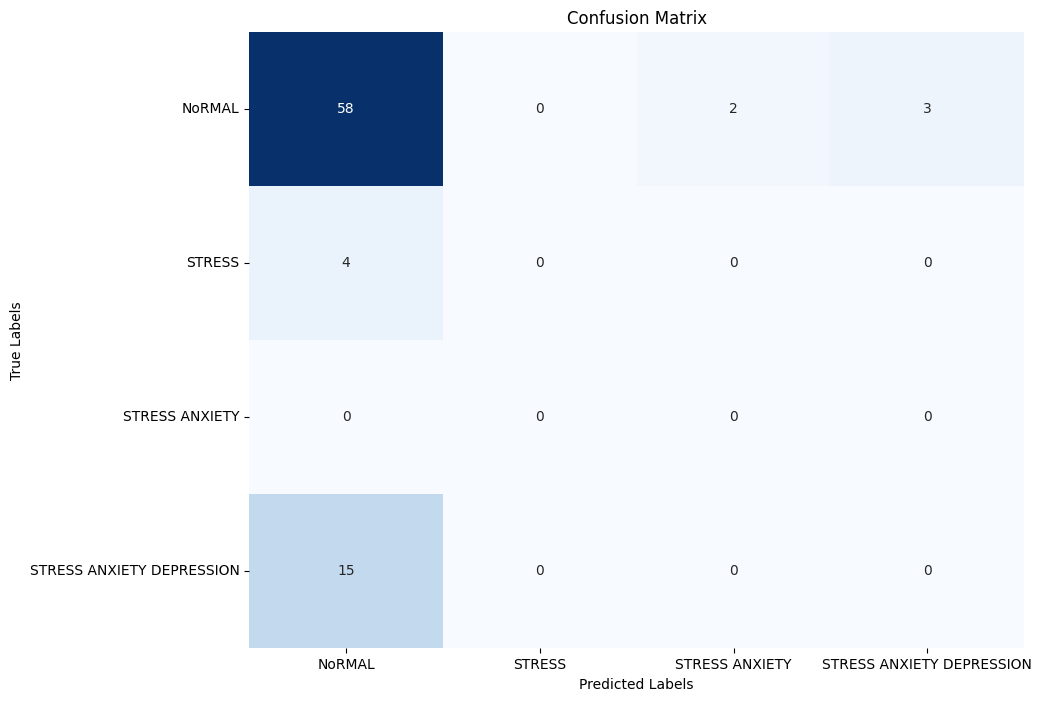

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


random_seed = 42
# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=random_seed)
rf_classifier.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_normalized)
y_pred_proba = rf_classifier.predict_proba(X_test_normalized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


y_pred_unique = np.unique(y_pred)
y_test_unique = np.unique(y_test)
unique_labels = np.union1d(y_pred_unique, y_test_unique)

# Create a dictionary mapping index to label name
index_to_label = {i: label for i, label in enumerate(label_names)}
# Extract label names from the index obtained from np.unique(y_pred)
labels = [index_to_label[idx] for idx in unique_labels]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Get important features

In [ ]:
# Get feature importances
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

print(importance_df_rf)

# # Print the top n important features
# n = 25  # Number of top important features to display
# print(f"Top {n} important features using RandomForestClassifier:")
# print(importance_df_rf.head(n))


                                     Feature  Importance
26                                    Weight    0.083492
28                                 BMI_index    0.082654
33                                Heart Rate    0.077333
19                                 Ethnicity    0.063281
27                                    Height    0.063005
4                                          T    0.056159
2                                          M    0.053020
25                                       Age    0.051535
7                                      Anadn    0.045406
31                                         N    0.035902
5                                       A365    0.030630
8                                        POM    0.029834
1                                      Kv100    0.028093
22                                    Gender    0.027317
24                            Typer of skins    0.025350
3                                          δ    0.024056
11                             

## GradientBoostingClassifier

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# random_seed = 42

# # Initialize and train the GradientBoostingClassifier
# gb_classifier = GradientBoostingClassifier(random_state=random_seed)
# gb_classifier.fit(X_train_normalized, y_train)

# # Predict probabilities for each class
# y_pred_proba = gb_classifier.predict_proba(X_test_normalized)

# # Predict on the test set
# y_pred = gb_classifier.predict(X_test_normalized)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


# y_pred_unique = np.unique(y_pred)
# y_test_unique = np.unique(y_test)
# unique_labels = np.union1d(y_pred_unique, y_test_unique)

# # Create a dictionary mapping index to label name
# index_to_label = {i: label for i, label in enumerate(label_names)}
# # Extract label names from the index obtained from np.unique(y_pred)
# labels = [index_to_label[idx] for idx in unique_labels]

# # Calculate confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=labels, yticklabels=labels)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

# Binary classification

In [ ]:
# Define a function to map encoded labels to 'NORMAL' and 'UNNORMAL'
def map_encoded_labels(label):
    if label in [0, 1, 3, 4, 5]:  # These are the encoded labels corresponding to 'ANXIETY', 'DEPRESSION', 'STRESS', 'STRESS ANXIETY', 'STRESS ANXIETY DEPRESSION'
        return 1  # 'UNNORMAL'
    else:
        return 0  # 'NORMAL'
new_labels = ['Normal', 'Disease']
# Apply the mapping function to the encoded labels
y_train_binary = y_train.apply(map_encoded_labels)
y_test_binary = y_test.apply(map_encoded_labels)


# Print unique labels after mapping
print("Unique labels in y_train_mapped:", y_train_binary.unique())
print("Unique labels in y_test_mapped:", y_test_binary.unique())


Unique labels in y_train_mapped: [0 1]
Unique labels in y_test_mapped: [0 1]


Accuracy: 0.6829268292682927
ROC AUC: 0.3320802005012532


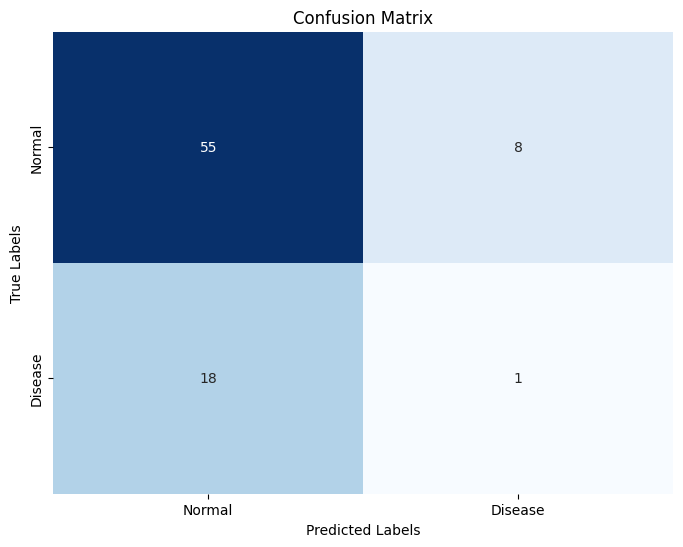

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Initialize RandomForestClassifier
rf_classifierAS = RandomForestClassifier(random_state=42)

# Train the model
rf_classifierAS.fit(X_train_normalized, y_train_binary)

# Predict on the test set
y_pred = rf_classifierAS.predict(X_test_normalized)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", accuracy)

# Calculate ROC AUC
y_pred_proba = rf_classifierAS.predict_proba(X_test_normalized)[:, 1]
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)
print("ROC AUC:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=new_labels, yticklabels=new_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
